# Graph Algorithms

In this notebook, we explore various graph algorithms and their applications using the NetworkX library. We will cover:

1. Breadth-First Search (BFS)
2. Depth-First Search (DFS)
3. Dijkstra's Algorithm for shortest paths
4. Spectral Clustering on the Karate Club graph
5. Graph Isomorphism tests
6. Graph Edit Distance (GED) and its application in machine learning

Each section includes code implementations, visualizations, and examples to help understand these fundamental graph algorithms.

## Implement a BFS on a graph

Write a function that performs a Breadth-First Search (BFS) on a graph starting from a given node. Return the order in which the nodes are visited.

Apply it to the given graph.

In [2]:

from collections import deque
def bfs(graph, start):
    """
    Perform Breadth-First Search (BFS) on a networkx graph.

    :param graph: networkx.Graph, the graph on which to perform BFS
    :param start: starting node for BFS
    :return: list of nodes in the order they are visited
    """
    visited = set()
    queue = deque([start])
    result = []

    while queue:
        node = queue.popleft()
        if node not in visited:
            visited.add(node)
            result.append(node)
            queue.extend(neighbor for neighbor in graph.neighbors(node) if neighbor not in visited)
    return result


BFS Order from A: ['A', 'B', 'C', 'D', 'E', 'F', 'G']


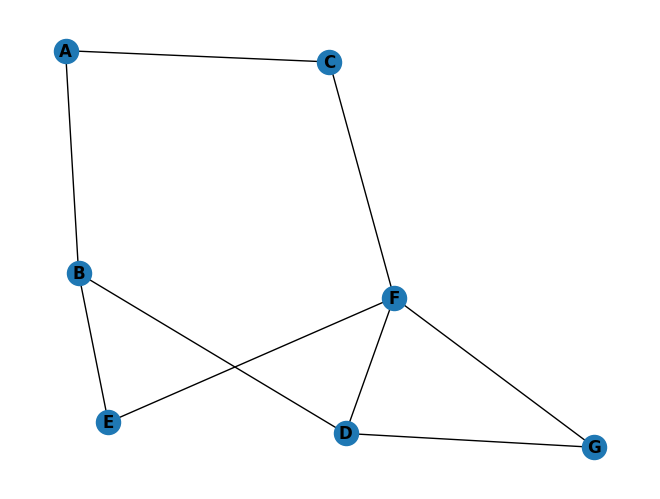

In [3]:
%matplotlib inline
import networkx as nx

# Define the adjacency list
edges = [
    ('A', 'B'), 
    ('A', 'C'),
    ('B', 'D'),
    ('B', 'E'),
    ('C', 'F'),
    ('E', 'F'),
    ('D', 'F'),
    ('D', 'G'),
    ('F', 'G')
]

# Create the graph
graph = nx.Graph()
graph.add_edges_from(edges)

# Draw the graph
nx.draw(graph, with_labels=True, font_weight='bold')
print("BFS Order from A:", bfs(graph, 'A'))


## Implement a DFS on a graph

Modify your code to implement a Depth-First Search (DFS) on a graph starting from a given node. Return the order in which the nodes are visited.

In [4]:

def dfs(graph, start):
    """
    Perform Depth-First Search (DFS) on a networkx graph.

    :param graph: networkx.Graph, the graph on which to perform DFS
    :param start: starting node for DFS
    :return: list of nodes in the order they are visited
    """
    visited = set()
    stack = [start]
    result = []

    while stack:
        node = stack.pop()
        if node not in visited:
            visited.add(node)
            result.append(node)
            stack.extend(neighbor for neighbor in graph.neighbors(node) if neighbor not in visited)
    return result

# Example usage
print("DFS Order:", dfs(graph, 'A'))


DFS Order: ['A', 'C', 'F', 'G', 'D', 'B', 'E']


## 2. Implement Dijkstra's Algorithm

Write a function to find the shortest path from a source node to all other nodes using Dijkstra's algorithm. Modify the weights to see how the shortest path changes.

In [5]:

import heapq

def dijkstra(graph, start):
    """
    Perform Dijkstra's algorithm to find shortest paths from a source node.

    :param graph: networkx.Graph, the graph on which to perform Dijkstra's algorithm
    :param start: starting node for Dijkstra's algorithm
    :return: dict of shortest distances from the source to each node
    """
    distances = {node: float('inf') for node in graph.nodes}
    distances[start] = 0
    priority_queue = [(0, start)]

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)
        
        if current_distance > distances[current_node]:
            continue
        
        for neighbor in graph.neighbors(current_node):
            weight = graph[current_node][neighbor].get('weight', 1)
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))
    
    return distances



Shortest Paths: {'A': 0, 'B': 1, 'C': 1, 'D': 1, 'E': 2, 'F': 2, 'G': 2, 'H': 3, 'I': 3, 'J': 3, 'K': 4, 'L': 4}


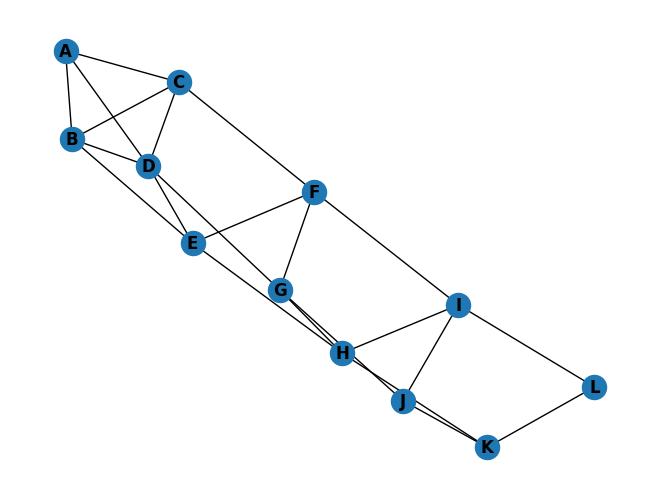

In [6]:

# Example weighted graph
graph = nx.Graph()
edges = [
    ('A', 'B', 1), 
    ('A', 'C', 1), 
    ('B', 'C', 1), 
    ('B', 'D', 1), 
    ('C', 'D', 1),
    ('D', 'E', 1), 
    ('E', 'F', 1), 
    ('F', 'G', 1), 
    ('G', 'H', 1), 
    ('H', 'I', 1), 
    ('I', 'J', 1), 
    ('J', 'K', 1), 
    ('K', 'L', 1),
    ('A', 'D', 1), 
    ('B', 'E', 1), 
    ('C', 'F', 1), 
    ('D', 'G', 1), 
    ('E', 'H', 1), 
    ('F', 'I', 1), 
    ('G', 'J', 1), 
    ('H', 'K', 1), 
    ('I', 'L', 1)
]
graph.add_weighted_edges_from(edges)

nx.draw(nx.Graph(graph), with_labels=True, font_weight='bold')

print("Shortest Paths:", dijkstra(graph, 'A'))


## 3. Cluster the Karate Club Graph

Use the NetworkX library to cluster the famous Karate Club graph into 2, 3, or 4 clusters using a spectral clustering algorithm.

In [7]:
import networkx as nx
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

# Charger le graphe Karate Club
G = nx.karate_club_graph()

# Calculer la matrice Laplacienne normalisée
laplacian = nx.normalized_laplacian_matrix(G).toarray()

# Obtenir les 2, 3 ou 4 premiers vecteurs propres (selon le nombre de clusters souhaité)
num_clusters = 2  # Modifier pour 2, 3 ou 4 clusters

eigvals, eigvecs = np.linalg.eigh(laplacian)
X = eigvecs[:, :num_clusters]  # Sélectionner les vecteurs propres correspondants

# # Normaliser les vecteurs propres pour éviter les échelles inégales
# X = normalize(X, axis=1)

# Appliquer K-Means sur les vecteurs propres
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(X)

# Associer chaque nœud à un cluster
clusters = {i: [] for i in range(num_clusters)}
for node, label in enumerate(labels):
    clusters[label].append(node)

# Afficher les clusters
for cluster_id, nodes in clusters.items():
    print(f"Cluster {cluster_id + 1}: {sorted(nodes)}")


Cluster 1: [0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]
Cluster 2: [8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


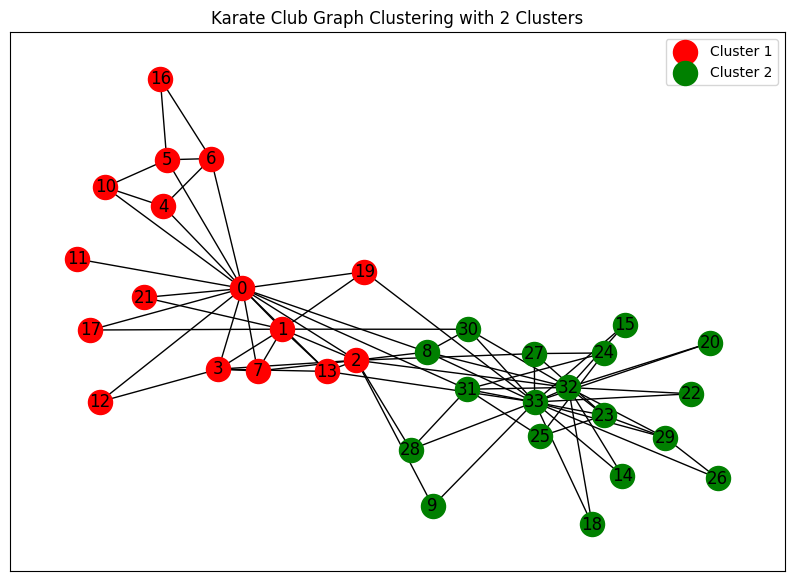

In [8]:

import matplotlib.pyplot as plt

# Visualiser les clusters
pos = nx.spring_layout(G)  # Positionner les nœuds pour la visualisation
colors = ['r', 'g', 'b', 'y']  # Couleurs pour les clusters

plt.figure(figsize=(10, 7))
for cluster_id, nodes in clusters.items():
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors[cluster_id], label=f'Cluster {cluster_id + 1}')
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.legend()
plt.title(f'Karate Club Graph Clustering with {num_clusters} Clusters')
plt.show()


# Isomorphism 

In this section, we will explore the concept of isomorphism in graphs. Two graphs are isomorphic if they have the same number of vertices and edges, and the same connectivity.

Test if two graphs are isomorphic using the NetworkX library.

In [9]:
import networkx as nx
import random

G1 = nx.karate_club_graph()
G2 = nx.karate_club_graph()
nodes = list(G2.nodes)
random.shuffle(nodes)
mapping = {old_label: new_label for old_label, new_label in zip(G2.nodes, nodes)}
G2 = nx.relabel_nodes(G2, mapping)

G3 = G2.copy()
G3.add_edge(0, 1)
G4 = G2.copy()
G3.add_edge(1, 2)

In [10]:

print("Are G1 and G2 isomorphic?", nx.is_isomorphic(G1, G2))

print("Are G3 and G4 isomorphic?", nx.is_isomorphic(G3, G4))


Are G1 and G2 isomorphic? True
Are G3 and G4 isomorphic? False


Implement your own version of a naive algorithm to test if two graphs are isomorphic.

In [11]:
from itertools import permutations

def are_isomorphic(G1,G2):
    """
    Check if two graphs are isomorphic.
    """
    if G1.number_of_nodes() != G2.number_of_nodes() or G1.number_of_edges() != G2.number_of_edges():
        return False
    for perm in permutations(G2.nodes):
        mapping_G1_G2 = {G1_node: G2_node for G1_node, G2_node in zip(G1.nodes, perm)}
        if all((mapping_G1_G2[u], mapping_G1_G2[v]) in G2.edges for u, v in G1.edges):
            mapping_G2_G1 = {G2_node: G1_node for G2_node, G1_node in zip(perm, G1.nodes)}
            if all((mapping_G2_G1[u], mapping_G2_G1[v]) in G1.edges for u, v in G2.edges): 
                return True
    return False


In [12]:

print("Are G1 and G2 isomorphic?", are_isomorphic(G1, G2))
print("Are G3 and G4 isomorphic?", are_isomorphic(G3, G4))

Are G1 and G2 isomorphic? True
Are G3 and G4 isomorphic? False


In [13]:
import networkx as nx
from collections import defaultdict

def weisfeiler_lehman_test(G1, G2, iterations=3):
    """
    Perform the Weisfeiler-Lehman isomorphism test on two graphs.

    :param G1: First graph (networkx.Graph)
    :param G2: Second graph (networkx.Graph)
    :param iterations: Number of iterations for the WL test
    :return: True if G1 and G2 are isomorphic, False otherwise
    """
    def initial_labeling(G):
        return {node: str(G.degree(node)) for node in G.nodes()}

    def refine_labels(G, labels):
        new_labels = {}
        for node in G.nodes():
            neighbor_labels = sorted([labels[neighbor] for neighbor in G.neighbors(node)])
            new_labels[node] = labels[node] + ''.join(neighbor_labels)
        return new_labels

    def compress_labels(labels):
        label_map = {}
        compressed_labels = {}
        current_label = 0
        for node, label in labels.items():
            if label not in label_map:
                label_map[label] = str(current_label)
                current_label += 1
            compressed_labels[node] = label_map[label]
        return compressed_labels

    labels_G1 = initial_labeling(G1)
    labels_G2 = initial_labeling(G2)

    for _ in range(iterations):
        labels_G1 = refine_labels(G1, labels_G1)
        labels_G2 = refine_labels(G2, labels_G2)
        labels_G1 = compress_labels(labels_G1)
        labels_G2 = compress_labels(labels_G2)

    label_multiset_G1 = sorted(labels_G1.values())
    label_multiset_G2 = sorted(labels_G2.values())

    return label_multiset_G1 == label_multiset_G2



In [14]:
print("Are G1 and G2 isomorphic according to WL test?", weisfeiler_lehman_test(G1, G2))
print("Are G3 and G4 isomorphic according to WL test?", weisfeiler_lehman_test(G3, G4))

Are G1 and G2 isomorphic according to WL test? True
Are G3 and G4 isomorphic according to WL test? False


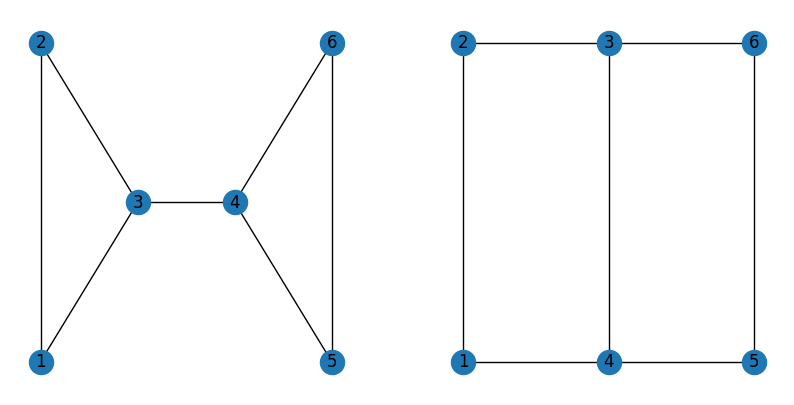

In [16]:
import matplotlib.pyplot as plt 

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

G1 = nx.Graph()
positions_G1 = {1: (0,0), 2: (0, 1), 3: (1, 0.5), 4: (2, .5), 5:(3,0), 6:(3,1)}
G1.add_edges_from([(1, 2), (1, 3), (2,3), (3, 4),(4,5),(4,6),(6,5)])
nx.draw(G1, with_labels=True, pos=positions_G1,ax=axes[0])

G2 = nx.Graph()
positions_G2 = {1: (0,0), 2: (0, 1), 3: (1, 1), 4: (1,0), 5:(2,0), 6:(2,1)}
G2.add_edges_from([(1, 2),  (2,3), (1, 4), (3, 4),(4,5),(3,6),(6,5)])
nx.draw(G2, with_labels=True,ax=axes[1],pos=positions_G2)


In [17]:
print("Are G1 and G2 isomorphic according to NetworkX?", nx.is_isomorphic(G1, G2))
print("Are G1 and G2 isomorphic according to WL test?", weisfeiler_lehman_test(G1, G2))
print("Are G1 and G2 isomorphic according to my Isomorphism ?", are_isomorphic(G1, G2)) # longer !!


Are G1 and G2 isomorphic according to NetworkX? False
Are G1 and G2 isomorphic according to WL test? True
Are G1 and G2 isomorphic according to my Isomorphism ? False


And with bigger graphs  ?

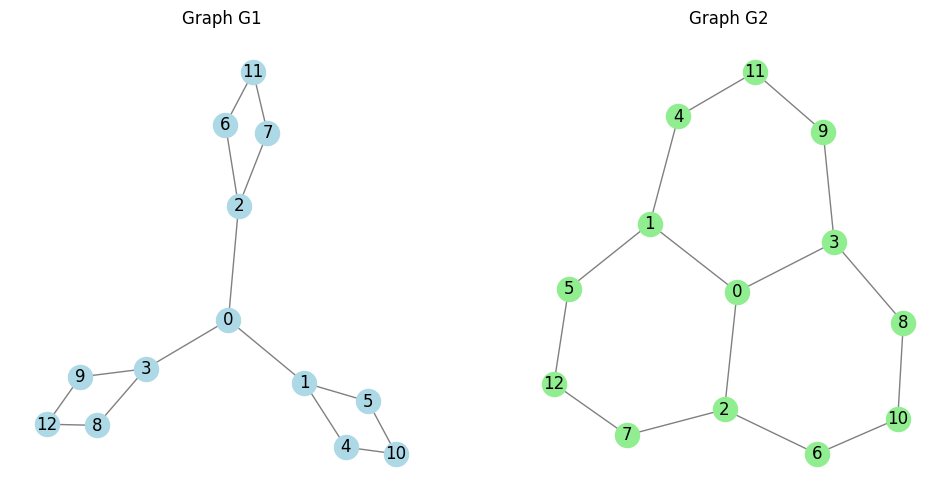

In [18]:

# Create the Cai-Fürer-Immerman graphs
G1 = nx.Graph()
G2 = nx.Graph()

# Add nodes and edges to G1
G1.add_edges_from([(0, 1), (0, 2), (0, 3), (1, 4), (1, 5), (2, 6), (2, 7), (3, 8), (3, 9)])
G1.add_edges_from([(4, 10), (5, 10), (6, 11), (7, 11), (8, 12), (9, 12)])

# Add nodes and edges to G2
G2.add_edges_from([(0, 1), (0, 2), (0, 3), (1, 4), (1, 5), (2, 6), (2, 7), (3, 8), (3, 9)])
G2.add_edges_from([(4, 11), (5, 12), (6, 10), (7, 12), (8, 10), (9, 11)])



# Display the graphs
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot G1
pos1 = nx.spring_layout(G1)
nx.draw(G1, pos1, ax=axes[0], with_labels=True, node_color='lightblue', edge_color='gray')
axes[0].set_title("Graph G1")

# Plot G2
pos2 = nx.spring_layout(G2)
nx.draw(G2, pos2, ax=axes[1], with_labels=True, node_color='lightgreen', edge_color='gray')
axes[1].set_title("Graph G2")

plt.show()



In [19]:
print("Are G1 and G2 isomorphic according to NetworkX?", nx.is_isomorphic(G1, G2))
print("Are G1 and G2 isomorphic according to WL test?", weisfeiler_lehman_test(G1, G2))
#print("Are G1 and G2 isomorphic according to my Isomorphism ?", are_isomorphic(G1, G2)) # longer !!


Are G1 and G2 isomorphic according to NetworkX? False
Are G1 and G2 isomorphic according to WL test? True


Using the bipartite graph matching approach, we can derive even faster approximate tests of graph isomorphism. Implement a function that uses this approach to test if two graphs are isomorphic.

In [20]:
import numpy as np
from scipy.optimize import linear_sum_assignment

def bipartite_graph_matching(G1, G2):
    """
    Perform bipartite graph matching between nodes of G1 and G2 using the Hungarian algorithm.

    :param G1: First graph (networkx.Graph)
    :param G2: Second graph (networkx.Graph)
    :return: List of matched node pairs (node_G1, node_G2)
    """
    nodes_G1 = list(G1.nodes)
    nodes_G2 = list(G2.nodes)
    
    # Initialize the cost matrix
    cost_matrix = np.zeros((len(nodes_G1), len(nodes_G2)))
    
    # Define the cost between nodes of G1 and G2
    for i, node_G1 in enumerate(nodes_G1):
        for j, node_G2 in enumerate(nodes_G2):
            # Example cost: difference in degrees
            cost_matrix[i, j] = abs(G1.degree(node_G1) - G2.degree(node_G2))
    
    # Use the Hungarian algorithm to find the best matching
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    
    # Create the list of matched node pairs
    matching = [(nodes_G1[i], nodes_G2[j]) for i, j in zip(row_ind, col_ind)]
    
    total_cost = cost_matrix[row_ind, col_ind].sum()
    return matching, total_cost

# Example usage
matching, cost = bipartite_graph_matching(G1, G2)
print("Matching between G1 and G2 nodes:", matching)
print(cost)

def bp_isomorphism(G1,G2):
    """
    Check if two graphs are isomorphic using the Hungarian algorithm.
    """
    if G1.number_of_nodes() != G2.number_of_nodes() or G1.number_of_edges() != G2.number_of_edges():
        return False
    matching, cost = bipartite_graph_matching(G1, G2)
    return cost == 0

print("Are G1 and G2 isomorphic according to NetworkX?", nx.is_isomorphic(G1, G2))
print("Are G1 and G2 isomorphic according to WL test?", weisfeiler_lehman_test(G1, G2))
print("Are G1 and G2 isomorphic according to Hungarian algorithm ?", bp_isomorphism(G1, G2))


Matching between G1 and G2 nodes: [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 11), (11, 12), (12, 10)]
0.0
Are G1 and G2 isomorphic according to NetworkX? False
Are G1 and G2 isomorphic according to WL test? True
Are G1 and G2 isomorphic according to Hungarian algorithm ? True


# Graph Edit Distance

Rather than considering only binary decision from the bipartite graph matching, we can also consider the cost of the matching. This is the basis of the Graph Edit Distance (GED) measure.

1. Extend the bipartite graph matching approach to compute a matching between graphs having a different size.

In [70]:
def bipartite_graph_matching_with_edition(G1, G2):
    G1 = G1.copy()
    G2 = G2.copy()
    """
    Perform bipartite graph matching between nodes of G1 and G2 using the Hungarian algorithm.
    Include dummy nodes to handle graphs with different sizes.

    :param G1: First graph (networkx.Graph)
    :param G2: Second graph (networkx.Graph)
    :return: List of matched node pairs (node_G1, node_G2)
    """

    if G1.number_of_nodes() >  G2.number_of_nodes():
        G1, G2 = G2, G1
    
    # G1 is the smaller graph

    nodes_G1 = list(G1.nodes)
    n = len(nodes_G1) 
    nodes_G2 = list(G2.nodes)
    m = len(nodes_G2)

    # Add dummy nodes to graphs (G1)
    dummy_nodes = ['eps_{}'.format(i) for i in range(m)]
    G1.add_nodes_from(dummy_nodes)

    dummy_nodes = ['eps_{}'.format(i) for i in range(n)]
    G2.add_nodes_from(dummy_nodes)
    

    # Initialize the cost matrix (square matrix)
    cost_matrix = np.ones((n+m, n+m))*np.inf
    
    # Define the substitution cost between nodes of G1 and G2
    for i, node_G1 in enumerate(nodes_G1):
        for j, node_G2 in enumerate(nodes_G2):
            # substitution cost
            # print(G1.degree(node_G1),G2.degree(node_G2))
            cost_matrix[i, j] = abs(len(G1[node_G1]) - len(G2[node_G2]))
    
    for i in range(n):
        # insertion cost
        cost_matrix[i, m+i ] = 1
    
    for j in range(m):
        # deletion cost
        cost_matrix[m+j,j] = 1
    
    for i,j in  zip(range(n), range(m)):
        # dummy to dummy mapping
        cost_matrix[n+i, m+j] = 0

   
    # Use the Hungarian algorithm to find the best matching
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    nodes_G1 = list(G1.nodes)
    nodes_G2 = list(G2.nodes)
    # Create the list of matched node pairs
    matching = [(nodes_G1[i] if i < n else None, nodes_G2[j] if j < m else None) for i, j in zip(row_ind, col_ind)]
    
    total_cost = cost_matrix[row_ind, col_ind].sum()
    return matching, total_cost


Matching between G1 and G2 nodes: [(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None)]
Total cost: 2.0


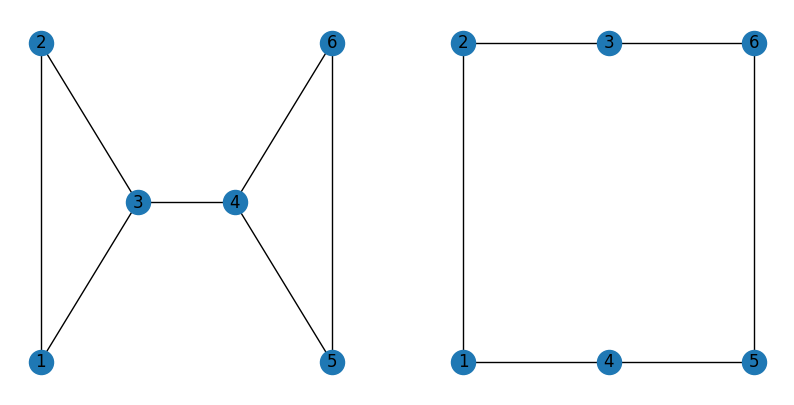

In [71]:
import matplotlib.pyplot as plt 

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

G1 = nx.Graph()
positions_G1 = {1: (0,0), 2: (0, 1), 3: (1, 0.5), 4: (2, .5), 5:(3,0), 6:(3,1)}
G1.add_edges_from([(1, 2), (1, 3), (2,3), (3, 4),(4,5),(4,6),(6,5)])
nx.draw(G1, with_labels=True, pos=positions_G1,ax=axes[0])

G2 = nx.Graph()
positions_G2 = {1: (0,0), 2: (0, 1), 3: (1, 1), 4: (1,0), 5:(2,0), 6:(2,1)}
G2.add_edges_from([(1, 2),  (2,3), (1, 4), (4,5),(3,6),(6,5)])
nx.draw(G2, with_labels=True,ax=axes[1],pos=positions_G2)

# Example usage
matching, total_cost = bipartite_graph_matching_with_edition(G1, G2)
print("Matching between G1 and G2 nodes:", matching)
print("Total cost:", total_cost)




2. Implement a function that computes the GED between two graphs given the node mapping and edge mapping costs.

To compute the ged, you will have to 
- For each pair of matched nodes, check if:
    - A node is matched to an empty node => node deletion or insertion cost
    - Same label: otherwise substitution cost
- For each edge in G1 between nodes i and j, check if there is an edge between \(\phi(i)\) and \(\phi(j)\)
    - If yes, substitution cost if edge labels are different, otherwise 0
    - If no, edge deletion or insertion cost
- Test the same for edges in G2


In [90]:
def ged(G1,G2, mapping):
    node_cost = 1  # Cost for node insertion/deletion
    edge_cost = 1  # Cost for edge insertion/deletion
    substitution_cost = 1  # Cost for node/edge substitution

    total_cost = 0

    # Calculate node costs
    for node_G1, node_G2 in mapping:
        if node_G1 is None and node_G2 is not None:
            total_cost += node_cost
            print(f" node : {node_G1, node_G2}")
        elif node_G1 is not None and node_G2 is None:
            total_cost += node_cost
            print(f" node : {node_G1, node_G2}")
        elif node_G1 is not None and node_G2 is not None:
            if G1.nodes[node_G1] != G2.nodes[node_G2]:
                total_cost = total_cost; # test the labels if needed ! 
                #total_cost += substitution_cost
    
    mapping_G1_G2 = {node_G1: node_G2 for node_G1, node_G2 in mapping}
    mapping_G2_G1 = {node_G2: node_G1 for node_G1, node_G2 in mapping}

    # Calculate edge costs
    for edge in G1.edges():
        u,v = edge
        phi_u, phi_v = mapping_G1_G2[u], mapping_G1_G2[v]
        if phi_u is None or phi_v is None:
            total_cost += edge_cost
            print(f"{u,v} -> {phi_u, phi_v}")
        elif (phi_u, phi_v) not in G2.edges:
            total_cost += edge_cost
            print(f"{u,v} -> {phi_u, phi_v}")
    print("---")
    for edge in G2.edges():
        u,v = edge
        phi_u, phi_v = mapping_G2_G1[u], mapping_G2_G1[v]
        if phi_u is None or phi_v is None:
            total_cost += edge_cost
            print(f"{u,v} -> {phi_u, phi_v}")
        elif (phi_u, phi_v) not in G1.edges:
            total_cost += edge_cost
            print(f"{u,v} -> {phi_u, phi_v}")    

    return total_cost

In [91]:
matching, _ = bipartite_graph_matching_with_edition(G1, G2)
print(matching)
distance = ged(G1,G2,matching)
print(distance)

[(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None)]
(1, 3) -> (1, 3)
(3, 4) -> (3, 4)
(4, 6) -> (4, 6)
---
(1, 4) -> (1, 4)
(3, 6) -> (3, 6)
5


Pour chaque paire de nœuds appariés, tester si : 
 - Un noeud est apparié à un noeud vide => suppression ou insertion du noeud
 - meme label : sinon cout de substitution
Pour chaque arete de G1 en i et j, checker si il existe une arete en \phi(i) et \phi(j)
Si oui, cout de substitution si les labels d'aretes sont différents, sinon 0
Si non cout de suppression ou insertion

## GED for Machine learning

Check the code available in the `pyged` library : https://github.com/bgauzere/pyged/

Use this library or adapt your code to compute the GED between the graphs of the Acyclic Dataset. This dataset is composed of 183 molecules together with their boiling points. The goal is to predict the boiling point of a molecule given its structure.

Combine your GED computation with a machine learning model (like KNN) to predict the boiling point of a molecule given its structure.

In [98]:
from greycdata.loaders import load_acyclic

graphs,y = load_acyclic()

graphs[0].nodes(data=True)


NodeDataView({0: {'x': 0.0, 'y': 0.0, 'z': 0.0, 'atom_symbol': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'degree': 1.0}, 1: {'x': 0.0, 'y': 0.0, 'z': 0.0, 'atom_symbol': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'degree': 1.0}, 2: {'x': 0.0, 'y': 0.0, 'z': 0.0, 'atom_symbol': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'degree': 2.0}})

In [103]:
from pyged.costfunctions import ConstantCostFunction
from pyged.ged import GED

cf = ConstantCostFunction(cni=3, cns=1,ces =1, cei=3, label_to_compare="atom_symbol")
ged = GED(cf)
d, _, _ = ged.ged(graphs[0],graphs[1])
print(d)

12


In [ ]:
from tqdm import tqdm 
N = len(y)
distance_matrix = np.zeros((N,N))
    
for i, G in tqdm(enumerate(graphs)):
    for j, H in enumerate(graphs[i+1:], i+1):
        distance_matrix[i,j], _ ,_=  ged.ged(G,H)
        distance_matrix[j,i] = distance_matrix[i,j]

Mean Absolute Error: 20.718918918918916


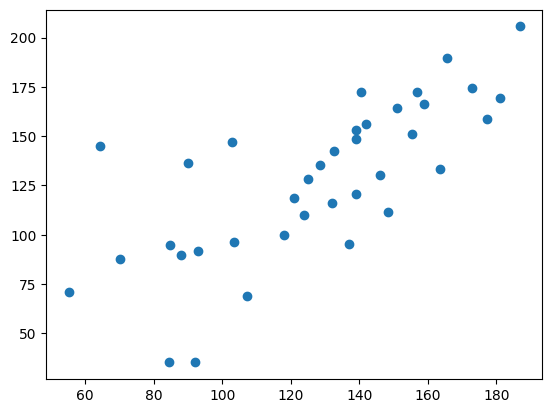

In [117]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


# Split the data into training and testing sets
X_train_indices, X_test_indices, y_train, y_test = train_test_split(np.arange(len(distance_matrix)), y, test_size=0.2, random_state=42)
X_train = distance_matrix[np.ix_(X_train_indices, X_train_indices)]
X_test = distance_matrix[np.ix_(X_test_indices, X_train_indices)]

# Initialize the KNN regressor
knn = KNeighborsRegressor(n_neighbors=3, metric='precomputed')

# Fit the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate the mean squared error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

plt.plot(y_test, y_pred, 'o')